In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [7]:
data.shape

(10841, 13)

In [8]:
data[data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [9]:
data[data["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data[data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [12]:
data.dropna(how = "any", inplace = True)

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

C:\Users\Mert AYDIN\AppData\Local\Temp\ipykernel_2744\3547678284.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data = data, x = data["Rating"], shade = True)


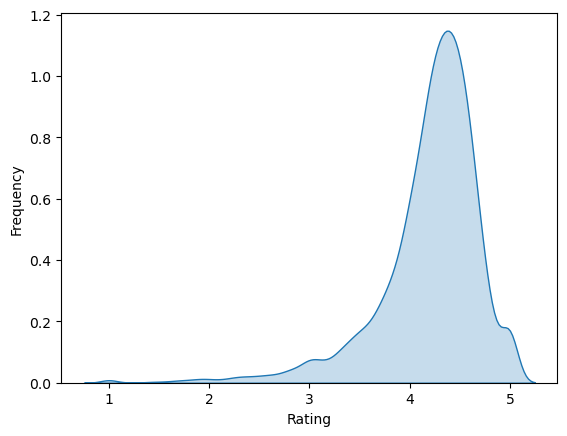

In [14]:
sb.kdeplot(data = data, x = data["Rating"], shade = True)
plt.ylabel("Frequency")
plt.show()

In [15]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

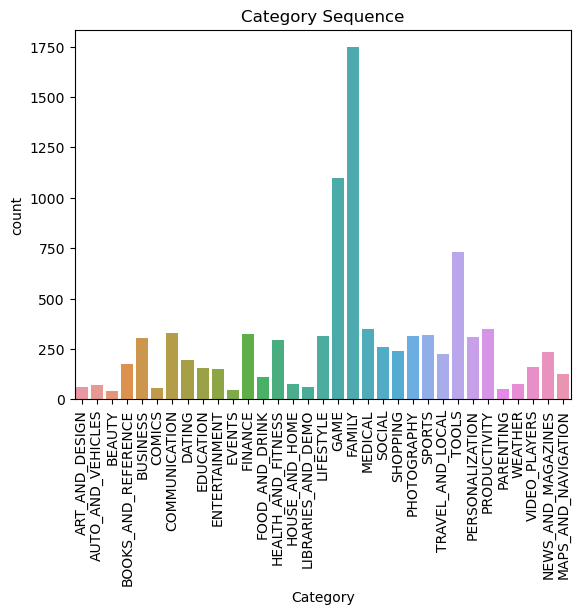

In [16]:
sb.countplot(data = data, x = "Category")
plt.xticks(rotation = 90)
plt.title("Category Sequence")
plt.show()

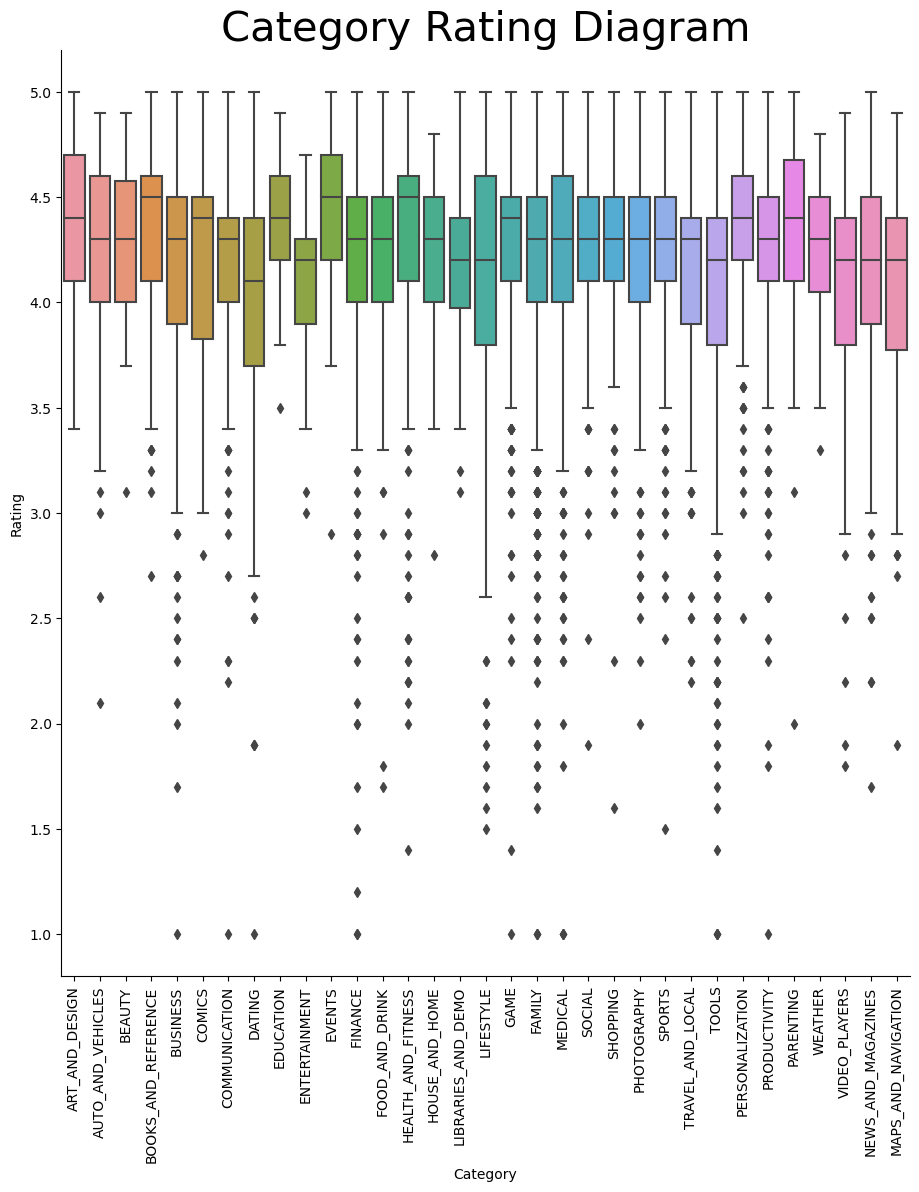

In [17]:
sb.catplot(data = data, y = "Rating", x = "Category", kind = "box", height = 10)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category Rating Diagram", size = 30)
plt.xticks(rotation = 90)
plt.show()

In [18]:
 data["Reviews"].head()   # object data type but we need int  

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [19]:
data["Reviews"] = data["Reviews"].apply(lambda x: int(x))
data["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

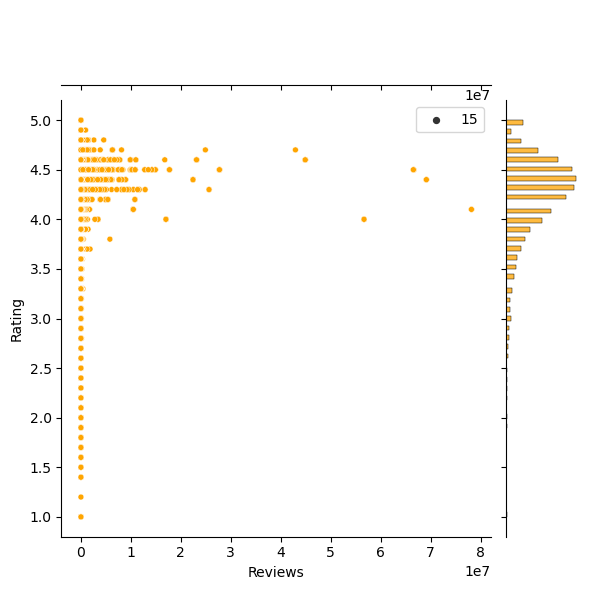

In [20]:
sb.jointplot(y = "Rating", x = "Reviews", data = data, size = 15, color = "orange");        

In [21]:
data["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [22]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [23]:
len(data["Size"] == "Varies with device")    

9360

In [24]:
data["Size"].replace("Varies with device", np.nan, inplace = True)

In [25]:
data["Size"] = (data["Size"].replace(r'[kM]+$', '', regex = True).astype(float) * \
                data["Size"].str.extract(r'[\d.]+([KM]+)', expand = False)
               .fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [26]:
data["Size"].fillna(data.groupby("Category")["Size"].transform("mean"), inplace = True)

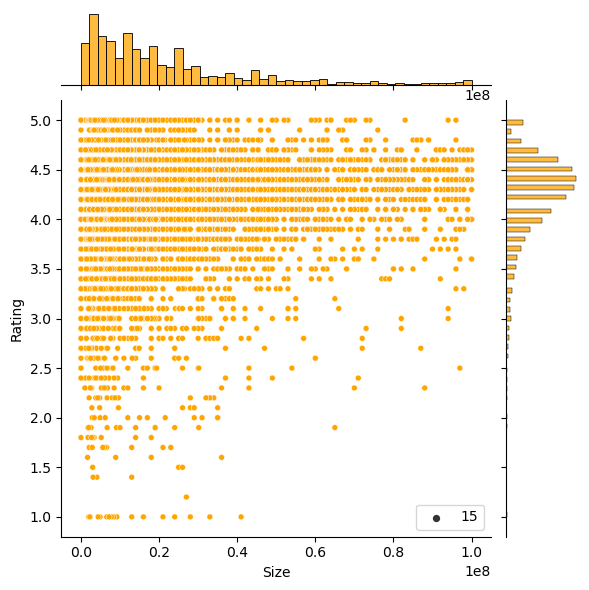

In [27]:
sb.jointplot(y = "Rating", x = "Size", data = data, size = 15, color = "orange"); 

In [28]:
data["Installs"].head()  # we want int type not object type

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [29]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [30]:
data["Installs"] = data["Installs"].apply(lambda x : x.replace(",",""))
data["Installs"] = data["Installs"].apply(lambda x : x.replace("+",""))
data["Installs"] = data["Installs"].apply(lambda x: int(x))

In [31]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

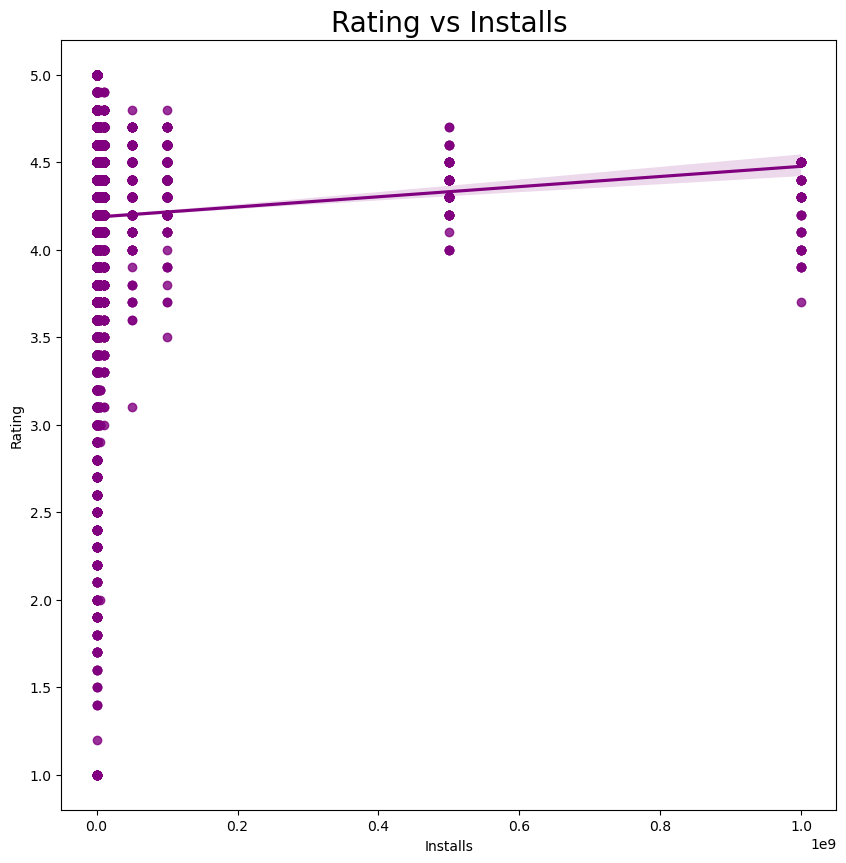

In [32]:
plt.figure(figsize = (10,10))
plt.title("Rating vs Installs", size = 20)
sb.regplot(y = "Rating", x = "Installs", data = data, color = "purple")
plt.show()

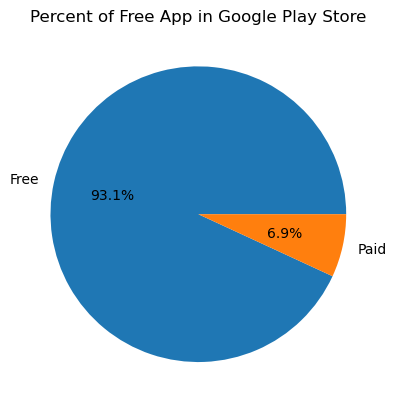

In [33]:
labels = data["Type"].value_counts(sort = True).index
sizes = data["Type"].value_counts(sort = True)
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.title("Percent of Free App in Google Play Store")
plt.show()

In [34]:
data["Free"] = data["Type"].map(lambda x: 1 if x  == "Free" else 0)
data.drop(["Type"], axis = 1, inplace = True)

In [35]:
data["Free"].unique()

array([1, 0], dtype=int64)

In [36]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [37]:
data["Price"] = data["Price"].apply(lambda x : x.replace("$",""))
data["Price"] = data["Price"].apply(lambda x: float(x))

In [38]:
data["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [39]:
data["Price"].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [40]:
data[data["Price"] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


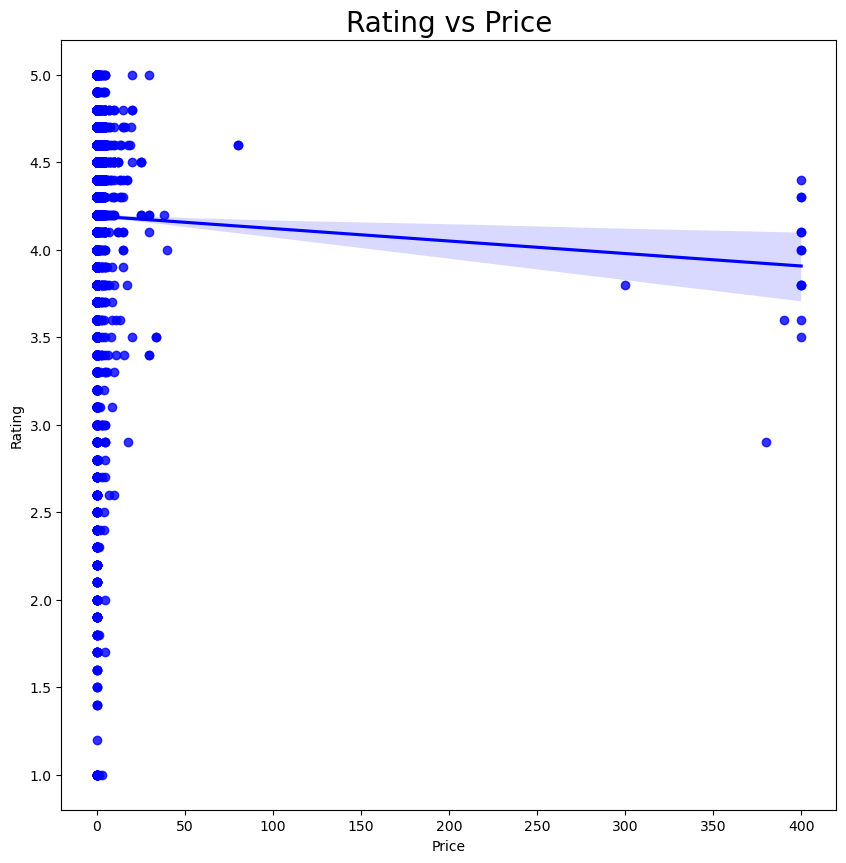

In [41]:
plt.figure(figsize = (10,10))
plt.title("Rating vs Price", size = 20)
sb.regplot(y = "Rating", x = "Price", data = data, color = "blue")
plt.show()

In [42]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [43]:
data["Content Rating"].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

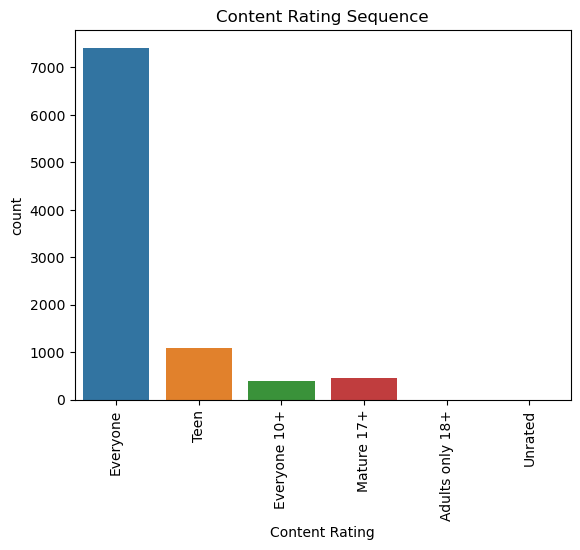

In [44]:
sb.countplot(data = data, x = "Content Rating")
plt.xticks(rotation = 90)
plt.title("Content Rating Sequence")
plt.show()

In [45]:
data = pd.get_dummies(data, columns = ["Content Rating"])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,1,0,0,0,0


In [46]:
data["Genres"].unique() 

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [47]:
data["Genres"].value_counts()

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64

In [48]:
data["Genres"] = data["Genres"].str.split(";").str[0]

In [50]:
data["Genres"].value_counts().head(10)

Tools            733
Entertainment    577
Education        563
Action           375
Productivity     351
Medical          350
Sports           337
Communication    329
Finance          323
Photography      317
Name: Genres, dtype: int64

In [51]:
data["Genres"].replace("Music & Audio", "Music", inplace = True)

<Figure size 700x700 with 0 Axes>

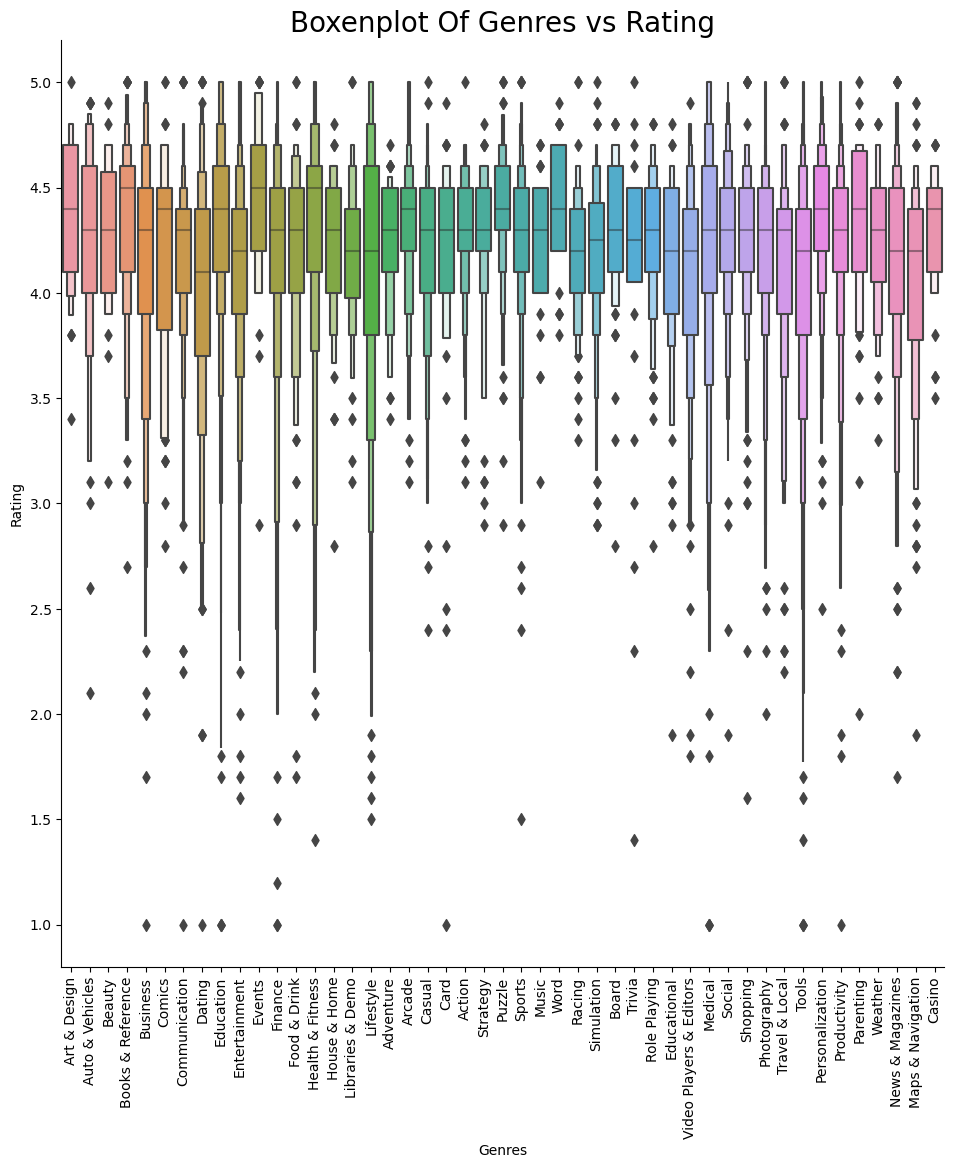

In [64]:
plt.figure(figsize = (7,7))
sb.catplot(x = "Genres", y = "Rating", data = data, kind = "boxen", height = 10)
plt.xticks(rotation = 90)
plt.title("Boxenplot Of Genres vs Rating", size = 20)
plt.show()

In [65]:
data["New"] = pd.to_datetime(data["Last Updated"])
data["New"].describe()

C:\Users\Mert AYDIN\AppData\Local\Temp\ipykernel_2744\3842831415.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data["New"].describe()


count                    9360
unique                   1299
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: New, dtype: object

In [66]:
data["Update"] = (data["New"]-data["New"].max()).dt.days
data["Update"].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: Update, dtype: int64

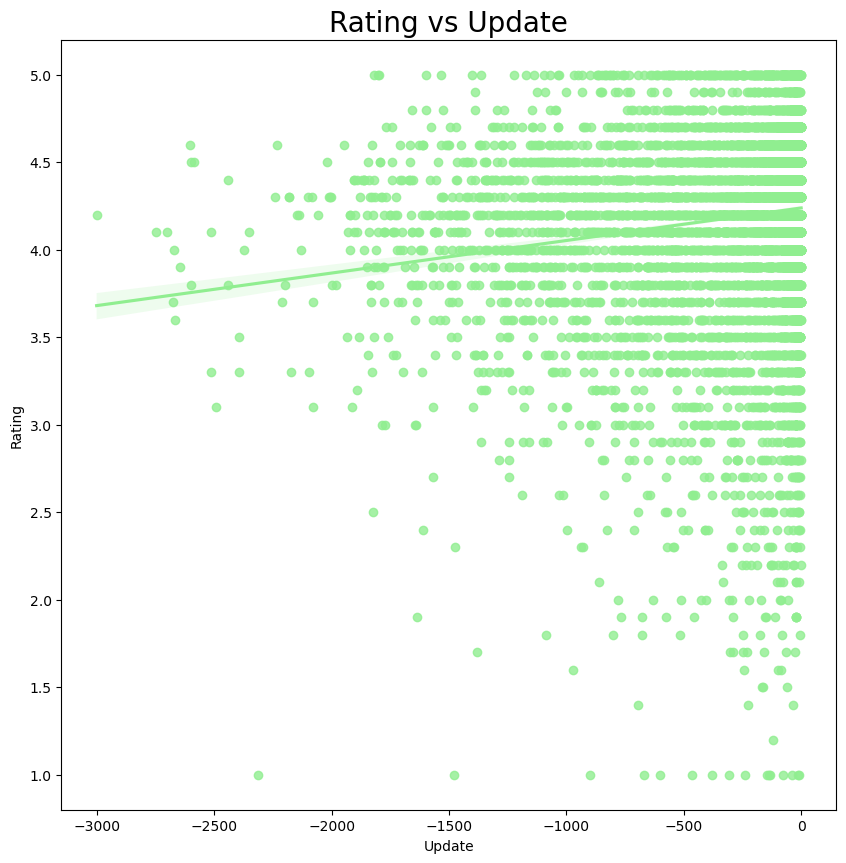

In [69]:
plt.figure(figsize = (10,10))
plt.title("Rating vs Update", size = 20)
sb.regplot(y = "Rating", x = "Update", data = data, color = "lightgreen")
plt.show()